In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import asyncio
from ipywidgets import Button, HBox, VBox

from IPython.display import display, clear_output

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

%gui asyncio

In [15]:
dirr = "../../data/models/"
starIPs = sorted(os.listdir(dirr))
#print(starIPs)
#print(starIPs[0])
data_files = {}
files = [glob.glob(dirr + i + '/*.data') for i in starIPs]
data_files = dict((starIPs[i], pd.read_csv(str(files[i][0]), skiprows=5, delim_whitespace=True)) for i in range(len(starIPs)))
output = ''

m08y024z+000


### Can choose star with starting parameters:
    Mass: 0.8, 1.0, 1.2, 1.4, 1.6, 1.8
    Initial Helium fraction: 0.24, 0.26, 0.28, 0.32, 0.36, 0.40
    Metallicity: -1.20, -0.60, -0.30, -0.15, 0.00, 0.15

In [7]:
def plotting(mass, He, met, msg):
    dirr = "../../data/models/"
    starIPs = sorted(os.listdir(dirr))
    starIPs.pop(0)
    massfiles = []
    Hefiles = []
    metfiles = []
    plotfiles = []
    global output
    massmsg = ''
    Hemsg = ''
    metmsg = ''
    

    if mass != None:
        #massmsg = msg
        massname = 'm'+Mass[mass]
        #print(massname)
        for i in starIPs:
            if str(i[0:3]) == massname:
                massfiles.append(glob.glob(dirr + i + '/*.data')[0])

    if He != None:
        #Hemsg = msg
        Hename = 'y'+HeFrac[He]
        #print(Hename)
        for i in starIPs:
            if str(i[3:7]) == Hename:
                Hefiles.append(glob.glob(dirr + i + '/*.data')[0])

    if met != None:
        #metmsg = msg
        metname = 'z'+Mets[met]
        #print(metname)
        for i in starIPs:
            if str(i[7:12]) == metname:
                metfiles.append(glob.glob(dirr + i + '/*.data')[0])

    #print(massfiles)
    #print(Hefiles)
    #print(metfiles)
    
    if mass == None and He == None and met == None:
        print(msg)
        plotfiles = (glob.glob(dirr + i + '/*.data')[0] for i in starIPs)
    else:
        output = output + ' ' + msg
        if mass == None:
            #output = Hemsg + metmsg
            for i in starIPs:
                massfiles.append(glob.glob(dirr + i + '/*.data')[0])
        if He == None: 
            #output = massmsg + metmsg
            for i in starIPs:
                Hefiles.append(glob.glob(dirr + i + '/*.data')[0])
        if met == None:
            #output = massmsg + Hemsg
            for i in starIPs:
                metfiles.append(glob.glob(dirr + i + '/*.data')[0])
        massfiles = set(massfiles)
        Hefiles = set(Hefiles)
        metfiles = set(metfiles)
        
        plotfiles = metfiles & Hefiles & massfiles
        plotfiles = list(plotfiles)
    
    print(output)
    
    for j in plotfiles:
        k = pd.read_csv(j, skiprows=5, delim_whitespace=True)
        plt.figure(1, figsize=(9,4))
        plt.subplot(121)
        plt.plot(k['log_Teff'], k['log_L'])
        plt.plot(k.loc[(k.log_R > 0.3)].log_Teff, k.loc[(k.log_R > 0.3)].log_L)
        plt.gca().invert_xaxis()
        plt.xlabel('Effective temperature (log($T_{eff}$))')
        plt.ylabel('Luminosity ($\log(L/L_{\odot})$)')
        plt.subplot(122)
        plt.plot(k['star_age'], k['log_R'])
        plt.plot(k.loc[(k.log_R > 0.3)].star_age, k.loc[(k.log_R > 0.3)].log_R)
        plt.plot(k.loc[(k.log_R > 1.2)].star_age, k.loc[(k.log_R > 1.2)].log_R)
        plt.scatter(k.loc[(k.log_center_T > 7.65)].star_age, k.loc[(k.log_center_T > 7.65)].log_R)
        #plt.xlim(1.4e10,)
        plt.xlabel('Star Age')
        plt.ylabel('Radius (log(R))')
    plt.show()


Showing all 216 tracks. Please wait a moment.



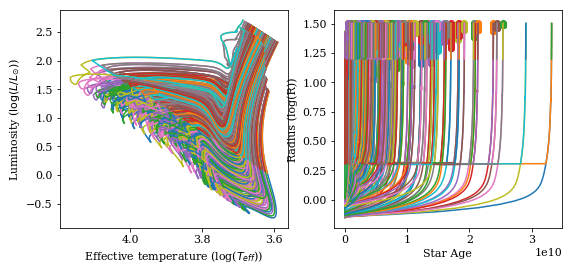

Choose value of intial mass, helium fraction and metallicity


 Showing only 1.4 solar mass stars.


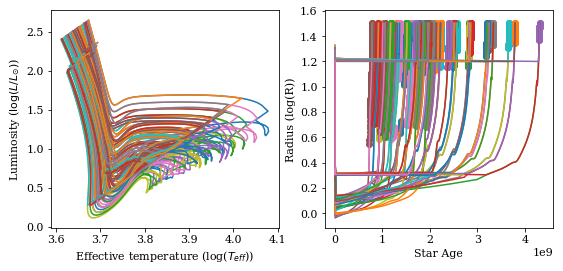

 Showing only 1.4 solar mass stars. Showing only stars with 0.32 initial helium fraction.


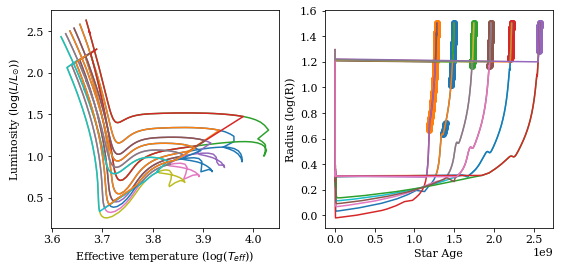

In [42]:
Mass = {'0.8':'08', '1.0':'10', '1.2':'12', '1.4':'14', '1.6':'16', '1.8':'18'}
HeFrac = {'0.24':'024', '0.26':'026', '0.28':'028', '0.32':'032', '0.36':'036', '0.40':'040'}
Mets = {'-1.20':'-120', '-0.60':'-060', '-0.30':'-030', '-0.15':'-015', '0.00':'+000', '0.15':'015'}

mass = None
He = None
met = None

output = ''

msg = 'Showing all ' +str(len(starIPs))+ ' tracks. Please wait a moment.'

plotting(mass, He, met, msg)

def mass_button_click(b):
    global mass
    mass = b.description
    msg = 'Showing only '+str(b.description)+' solar mass stars.'
    plotting(mass, He, met, msg)

def He_button_click(b):
    global He
    He = b.description
    msg = 'Showing only stars with '+str(b.description)+' initial helium fraction.'
    plotting(mass, He, met, msg)

def Met_button_click(b):
    global met
    met = b.description
    msg = 'Showing only stars with '+str(b.description)+' metallicity.'
    plotting(mass, He, met, msg)

massbuttons = []
Hebuttons = []
Metbuttons = []
print('Choose value of intial mass, helium fraction and metallicity')
for i, j in zip(Mass, range(len(Mass))):
    massbuttons.append(Button(description = i))
    massbuttons[j].on_click(mass_button_click)
for i, j in zip(HeFrac, range(len(HeFrac))):
    Hebuttons.append(Button(description = i))
    Hebuttons[j].on_click(He_button_click)
for i, j in zip(Mets, range(len(Mets))):
    Metbuttons.append(Button(description = i))
    Metbuttons[j].on_click(Met_button_click)
    
left_box = VBox([massbuttons[i] for i in range(len(Mass))])
mid_box = VBox([Hebuttons[i] for i in range(len(HeFrac))])
right_box = VBox([Metbuttons[i] for i in range(len(Mets))])
HBox([left_box, mid_box, right_box])

In [44]:
txt_files = {}
files = [glob.glob(dirr + i + '/*.txt') for i in starIPs]
txt_files = dict((starIPs[i], pd.read_csv(str(files[i][0]), skiprows=5, delim_whitespace=True)) for i in range(len(starIPs)))

masbuttons = []
Hbuttons = []
Mtbuttons = []
mas=None
H=None
mt=None

def echelle(mas, H, mt):
    if mas != None and H != None and mt != None:
        print('Mass = '+ str(mas))
        print('Helium Fraction = '+ str(H))
        print('Metallicity =' + str(mt))
        file_name = 'm'+ str(Mass[mas]) + 'y' + str(HeFrac[H]) + 'z' + str(Mets[mt])
        file = txt_files[file_name]
        
        dnuavg = np.mean(np.diff(file['Re(freq)']))
        print(r'Mean frequency spacing for these starting parameters is ' + str(dnuavg) + ' micro Hz$')
        #display(dg.head(10))
        plt.figure(3, figsize=(9,4))
        plt.subplot(121)
        plt.scatter(file['n_pg'], file['Re(freq)'])
        plt.xlabel('Radial order')
        plt.ylabel('Frequency ($\mu Hz$)')
        plt.subplot(122)
        plt.scatter(file['Re(freq)'] % dnuavg, file['Re(freq)'])
        plt.ylabel('Frequency ($\mu Hz$)')
        plt.xlabel('Frequency modulo ($\mu Hz$)')
        plt.show()

def mas_button_click(b):
    global mas
    mas = b.description
    echelle(mas, H, mt)    

def H_button_click(b):
    global H
    H = b.description
    echelle(mas, H, mt)

def Mt_button_click(b):
    global mt
    mt = b.description
    echelle(mas, H, mt)
    
print('Choose mass, helium fraction and metallicity:')
for i, j in zip(Mass, range(len(Mass))):
    masbuttons.append(Button(description = i))
    masbuttons[j].on_click(mas_button_click)

for i, j in zip(HeFrac, range(len(HeFrac))):
    Hbuttons.append(Button(description = i))
    Hbuttons[j].on_click(H_button_click)

for i, j in zip(Mets, range(len(Mets))):
    Mtbuttons.append(Button(description = i))
    Mtbuttons[j].on_click(Mt_button_click)

left_box = VBox([masbuttons[i] for i in range(len(Mass))])
mid_box = VBox([Hbuttons[i] for i in range(len(HeFrac))])
right_box = VBox([Mtbuttons[i] for i in range(len(Mets))])
HBox([left_box, mid_box, right_box])

Choose mass, helium fraction and metallicity:


In [45]:
file = "m10y024/M1.0_Y0.24_0212.index"
dh = pd.read_csv(folder+file, skiprows=1, delim_whitespace=True, names=['model','priority','profile'])
prof1 = dh.loc[(dh.priority == 1)]['model'].min()
prof2 = dh.loc[(dh.priority == 1)]['model'].max()
prof = [prof1, prof2]

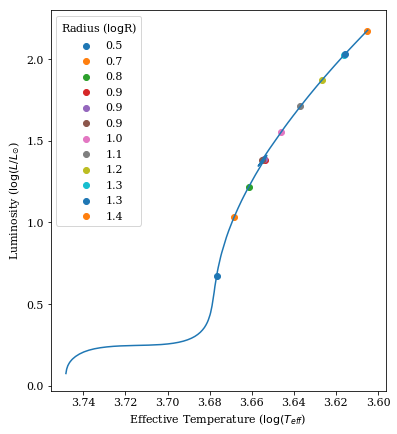

In [46]:
df = pd.read_csv(folder + 'm10y024/M1.0_Y0.24_0212.data', skiprows=5, delim_whitespace=True)
pts = pd.read_csv(folder + 'm10y024/M1.0_Y0.24_0212.index', skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
pts = pts.loc[(pts.priority == 1)]['model']

# This section of code is a test of a modification to the run_star_extras.f file
# that outputs a profile file when the star increases in radius in 0.1 log_R units.
# The conditions applied also allow multiple profiles to be produced for the region
# around the RGB bump.

# NOTE: This test appears to have been successful, and will now be applied to the
# grid of models.

plt.figure(1, figsize=(6,7))
df = df.loc[(df.he_core_mass != 0.0)]
plt.plot(df['log_Teff'], df['log_L'], label='')
#plt.scatter(df.loc[(df.model_number == 1500)]['log_Teff'],
#                df.loc[(df.model_number == 1500)]['log_L'], marker='x')
#plt.scatter(df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_Teff'],
#                df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_L'], alpha=0.5)
for i in pts:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'],
                label = f'{label[0]:.1f}')
          
          
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
plt.legend(title=r'Radius ($\log$R)')


plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


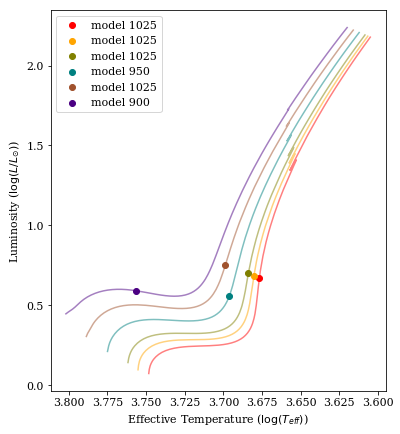

In [52]:
#folder = "~/Documents/mesa/models/"
#files = sorted(os.listdir('/home/daniel/Documents/mesa/models/'))
#dfs = [pd.read_csv(folder+str(i), skiprows=5, delim_whitespace=True) for i in files]
directory = '../../data/models/'

folders = sorted(os.listdir(directory))
folders.pop(0)
#print(folders)
files = [glob.glob(directory + i + '/*.data') for i in folders]
profs = [glob.glob(directory + i + '/*.index') for i in folders]
import itertools
colours = itertools.cycle(('r', 'orange', 'olive', 'teal', 'sienna', 'indigo'))#, 'black'))
## Need to develop tool for taking Y values and masses and allocating colours/linestyles (to-do)

Y = 0.24
M = 1.0



plt.figure(1, figsize=(6,7))
for i,j in zip(files, profs):
    df = pd.read_csv(i[0], skiprows=5, delim_whitespace=True)
    df = df.loc[(df.he_core_mass != 0.0)]
    dg = pd.read_csv(j[0], skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
    dg = dg.loc[(dg.priority == 1) & (dg.profile == 4)]['model']
    pt = dg.values
    if not pt:
        continue
    else:
        if str(i[0][27:30]) == str(M): #str(i[0][42:45])
            colour = next(colours)
            label = 'model '+str(int(pt))
            plt.scatter(df.loc[(df.model_number == int(pt))]['log_Teff'],
                    df.loc[(df.model_number == int(pt))]['log_L'], c=colour, label=label)
            label = str(i[0][47:51])
            #label = str(i[0][42:45])
            plt.plot(df['log_Teff'], df['log_L'], c=colour, zorder=0,
                     alpha=0.5, label=label)
    
    
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff})$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot})$)')
#plt.legend(['0.24', '0.26', '0.28', '0.32', '0.36', '0.40'], title=r'$Y_{init}$')
plt.legend()
plt.show()
